# Pre-Processing

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# chose path data
path_data = '/content/gdrive/MyDrive/pacmann data/Materia Probability/Project/insurance/'

In [3]:
# install library
! pip install -U kaleido # to save plotly to png

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 79.9 MB 1.2 MB/s 


In [45]:
# import library
import os
import pandas as pd
import seaborn as sns
import numpy as np
import itertools
import random
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io
from tabulate import tabulate
from scipy.stats import norm
from scipy.stats import expon
from scipy.stats import ttest_1samp, ttest_ind

In [5]:
# check file in path_data
os.listdir(path_data)

['insurance.csv']

In [6]:
# read data into dataframe with pandas
df_insurance = pd.read_csv(path_data + "insurance.csv")

In [7]:
# view data (check)
df_insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Data Description:

* age: Age of primary beneficiary
* sex:
Insurance contractor gender, female, male
* bmi:
Body mass index, providing an understanding of body, weights that are relatively high or
low relative to height, objective index of body weight (kg/m2) using the ratio of height to weight, ideally 18.5 to 24.9
* children:
Number of children covered by health insurance / Number of dependents
* smoker:
Smoking:
* region
The beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
* charges:
Individual medical costs billed by health insurance

In [8]:
# Check type data and others
df_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Secara umum data yang diberikan sudah sesuai dengan tipe begitu pun dengan jumlah baris sebanyak 1338 (tidak ada null values)

# Analisis Descriptive

In [9]:
# mencari nilai mean, median, q1, q3, min, max
df_insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Berdasarkan deskriptif statistik di atas, variabel dengan tipe objek tidak ada perhitungan deskriptif statistiknya. Untuk itu, saya menggunakan boxplot dengan memasukkan data kategorikal di dalamnya (smoker, sex, dan region) 

# Objektif Analisis (Bukan Hipotesis)
1. Berapa peluang laki-laki merokok?
2. Berapa peluang perempuan merokok?
3. Dari profile smoker, manakah biaya yang lebih (bill insurance) yang dikeluarkan sebuah asuransi?


## Visualize

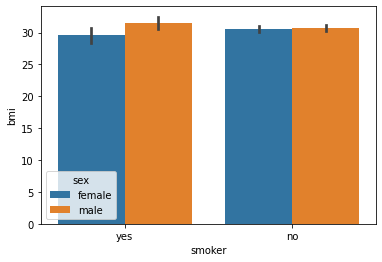

In [54]:
# visualisasi bmi dan merokok berdasarkan gender
sns.barplot(data=df_insurance, x="smoker", y="bmi", hue="sex")

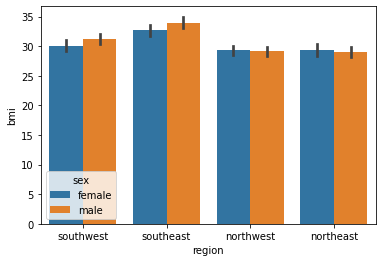

In [56]:
# visualisasi bmi di setiap region berdasarkan gender
sns.barplot(data=df_insurance, x="region", y="bmi", hue="sex")

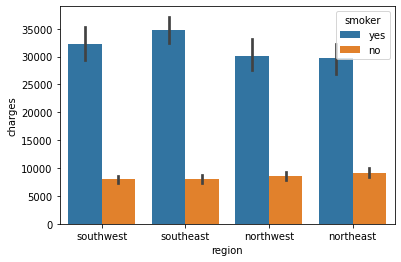

In [58]:
# visualisasi charge di masing-masing region berdasarkan merokok atau tidaknya
sns.barplot(data=df_insurance, x="region", y="charges", hue="smoker")

# Analisis Variabel Kategorik (PMF)

In [22]:
sex_smoker = df_insurance.pivot_table(index="smoker",columns="sex", values="age",aggfunc="count").fillna(0).astype("int")

# display
sex_smoker

sex,female,male
smoker,,
no,547,517
yes,115,159


## 1. Berapa peluang laki-laki yang mungkin merokok?

In [23]:
sex_smoker["male"]["yes"]/np.sum(sex_smoker.sum())

0.11883408071748879

##2. Berapa peluang perempuan merokok

In [24]:
sex_smoker["female"]["yes"]/np.sum(sex_smoker.sum())

0.08594917787742899

Peluang orang laki-laki yang mungkin merokok lebih besar dari perempuan

## 3. Dari profile smoker, manakah ekspteasi biaya yang dikeluarkan lebih besar?(bill insurance) 

In [59]:
bill_insurance_smoker = df_insurance.pivot_table(index="smoker", values="charges",aggfunc="mean")
bill_insurance_smoker

,charges
smoker,
no,8434.268298
yes,32050.231832


In [29]:
print("Berdasarkan hasil di atas:\n Eskpteasi biaya insurance dengan profile merokok bills-nya lebih besar dibandingkan yang tidak merokok")

Berdasarkan hasil di atas:
 Eskpteasi biaya insurance dengan profile merokok bills-nya lebih besar dibandingkan yang tidak merokok


## 4. Dari region, manakah ekspteasi biaya yang dikeluarkan lebih besar?(bill insurance) 

In [35]:
bill_insurance_smoker = df_insurance.pivot_table(index="region", values="charges",aggfunc="mean")
bill_insurance_smoker

,charges
region,
northeast,13406.384516
northwest,12417.575374
southeast,14735.411438
southwest,12346.937377


Berdasarkan hasil, eksprteasi charges paling tinggi ada di region southeast

## Visualize

# Analisi Variabel Kontinu

In [15]:
# Histogram of age with plotly
fig = px.histogram(df_insurance, x="age",title="Histogram of Age")
fig.show()

In [13]:
# Histogram of bmi with plotly
fig = px.histogram(df_insurance, x="bmi",title="Histogram of BMI")
fig.show()

In [16]:
# Histogram of children with plotly
fig = px.histogram(df_insurance, x="children",title="Histogram of Children")
fig.show()

In [17]:
# Histogram of charges with plotly
fig = px.histogram(df_insurance, x="charges",title="Histogram of Charges")
fig.show()

## BMI vs Charges

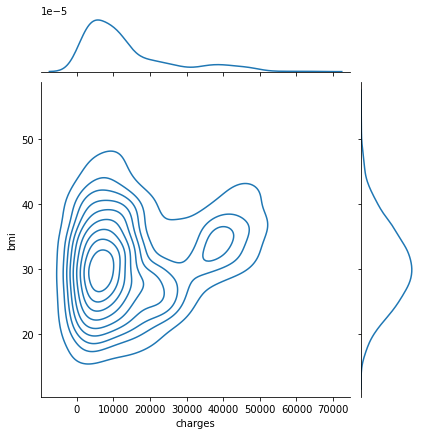

In [31]:
sns.jointplot(x='charges', y='bmi', data=df_insurance, kind='kde')

Hasil cdf bukan probabilitas, dari grafik di atas dapat disimpulkan bahwa persebaran bmi di rangw 20-40 dan charges 0-30.000 lebih banyak terlihat dari luasannya dari kontur join disribusinya

## Age vs Charges

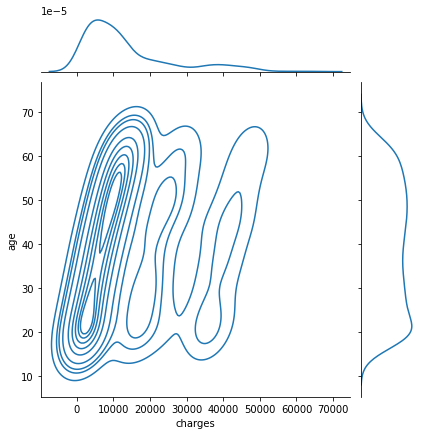

In [33]:
sns.jointplot(x='charges', y='age', data=df_insurance, kind='kde')

Dari grafik di atas dapat disimpulkan bahwa persebaran age di range 10-70 dan charges 0-10.000 lebih banyak terlihat dari luasannya dari kontur join disribusinya

## children vs charges

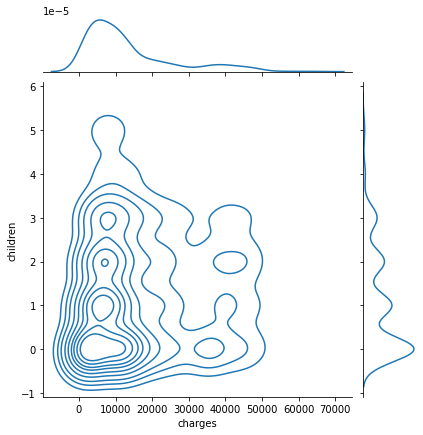

In [34]:
sns.jointplot(x='charges', y='children', data=df_insurance, kind='kde')

Dari grafik di atas dapat disimpulkan bahwa persebaran jumlah anak di rangw 0-3 dan charges 0-20.000 lebih banyak terlihat dari luasannya dari kontur join disribusinya

# Analisis Korelasi Variabel

Lanjutan dari distribusi di atas, dengan melihat tren (pola) melalui korelasi

## Bagaimana pola antara BMI dan Charges

Text(0, 0.5, 'bmi')

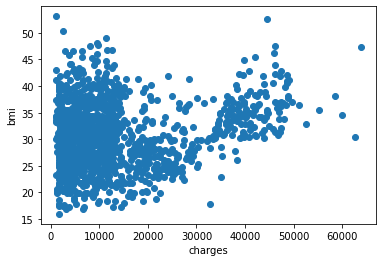

In [36]:
plt.scatter(df_insurance['charges'], df_insurance['bmi'])
plt.xlabel('charges')
plt.ylabel('bmi')

## Bagaimana pola antara age dan charges

Text(0, 0.5, 'age')

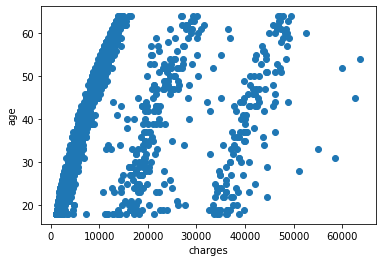

In [37]:
plt.scatter(df_insurance['charges'], df_insurance['age'])
plt.xlabel('charges')
plt.ylabel('age')

## Bagaimana pola antara children dan charges

Text(0, 0.5, 'children')

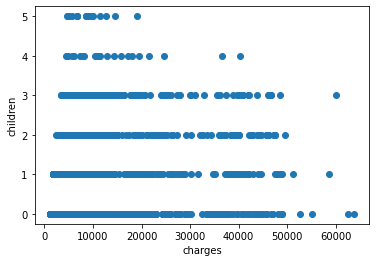

In [38]:
plt.scatter(df_insurance['charges'], df_insurance['children'])
plt.xlabel('charges')
plt.ylabel('children')

## Korelasi secara keseluruhan

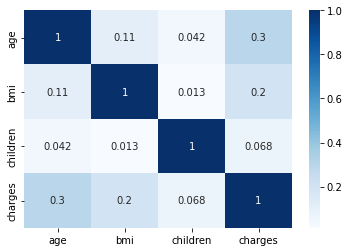

In [41]:
df_numerical = df_insurance[['age', 'bmi', 'children', 'charges']]
corr = df_numerical.corr()
sns.heatmap(corr, cmap="Blues", annot=True)

Secara keseluruhan korelasi antar variabel numerik cukup kecil. Bahkan, nilai korelasi palong besar hanya dimiliki oleh charges dengan age itupun korelasinya relatif cukup kecil

# Pengujian Hipotesis

## Pengaruh smoker terhadap charges dan BMI

**Hipotesis charges**<br>
Hipotesis Null : $\mu_1-\mu_2=0$, charges orang merokok sama dengan orang tidak merokok<br>
Hipotesis Alternative : $\mu_1 - \mu_2 != 0$, Charges orang merokok tidak sama dengan orang tidak merokok<br>
<br>
**Hipotesis BMI**<br>
Hipotesis Null : $\mu_1-\mu_2=0$, perolehan BMI orang merokok sama dengan orang tidak merokok <br>
Hipotesis Alternative : $\mu_1 - \mu_2 != 0$, perolehan BMI orang merokok tidak tidak sama dengan orang yang merokok

In [44]:
# check unique
smoker_cond = list(df_insurance['smoker'].unique())
smoker_cond

['yes', 'no']

In [51]:
# Mencari perbedaan charges antara merokok dan tidak
list_data = range(len(smoker_cond))
alpha = 0.05

for i in list_data:
  for j in list_data[i+1:]:
    type1 = df_insurance[df_insurance['smoker'] == smoker_cond[i]]["charges"]
    type2 = df_insurance[df_insurance['smoker'] == smoker_cond[j]]["charges"]

    stat, p = ttest_ind(type1, type2)
    print('=======================================================================')
    print('Hipotesis dari ' + str(smoker_cond[i] + ' dan ' + str(smoker_cond[j])))
    print('t=%.3f, p=%.3f' % (stat, p))
    
    # interpret via p-value
    if p < alpha:
      print('Tolak H0, maka charges dengan tipe {} (orang merokok) tidak sama dengan {} (orang tidak merokok).'.format(smoker_cond[i], smoker_cond[j]))
    else:
	    print('Gagal Tolak H0, maka charges dengan tipe {} (orang merokok) sama dengan {} (orang tidak merokok).'.format(smoker_cond[i], smoker_cond[j]))

Hipotesis dari yes dan no
t=46.665, p=0.000
Tolak H0, maka charges dengan tipe yes (orang merokok) tidak sama dengan no (orang tidak merokok).


Tolak H0, berarti kita cukup bukti untuk mengatakan bahwa charges orang merokok tidak sama dengan orang yang tidak orang

In [53]:
# Mencari perbedaan bmi antara merokok dan tidak
list_data = range(len(smoker_cond))
alpha = 0.05

for i in list_data:
  for j in list_data[i+1:]:
    type1 = df_insurance[df_insurance['smoker'] == smoker_cond[i]]["bmi"]
    type2 = df_insurance[df_insurance['smoker'] == smoker_cond[j]]["bmi"]

    stat, p = ttest_ind(type1, type2)
    print('=======================================================================')
    print('Hipotesis dari ' + str(smoker_cond[i] + ' dan ' + str(smoker_cond[j])))
    print('t=%.3f, p=%.3f' % (stat, p))
    
    # interpret via p-value
    if p < alpha:
      print('Tolak H0, maka bmi dengan tipe {} (orang merokok) tidak sama dengan {} (orang tidak merokok).'.format(smoker_cond[i], smoker_cond[j]))
    else:
	    print('Gagal Tolak H0, maka bmi dengan tipe {} (orang merokok) sama dengan {} (orang tidak merokok).'.format(smoker_cond[i], smoker_cond[j]))

Hipotesis dari yes dan no
t=0.137, p=0.891
Gagal Tolak H0, maka bmi dengan tipe yes (orang merokok) sama dengan no (orang tidak merokok).


Terima H0, berarti kita belum cukup bukti untuk mengatakan bahwa BMI orang yang merokok tidak sama dengan orang yang tidak merokok